im importing the libraries and fuctions i will use for this project

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

first im gonna load and preprocess the fashion mnist data

done

now i need to normalize the pixels to the range [0, 1] and add a channel dimension

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


im showing thte dataset

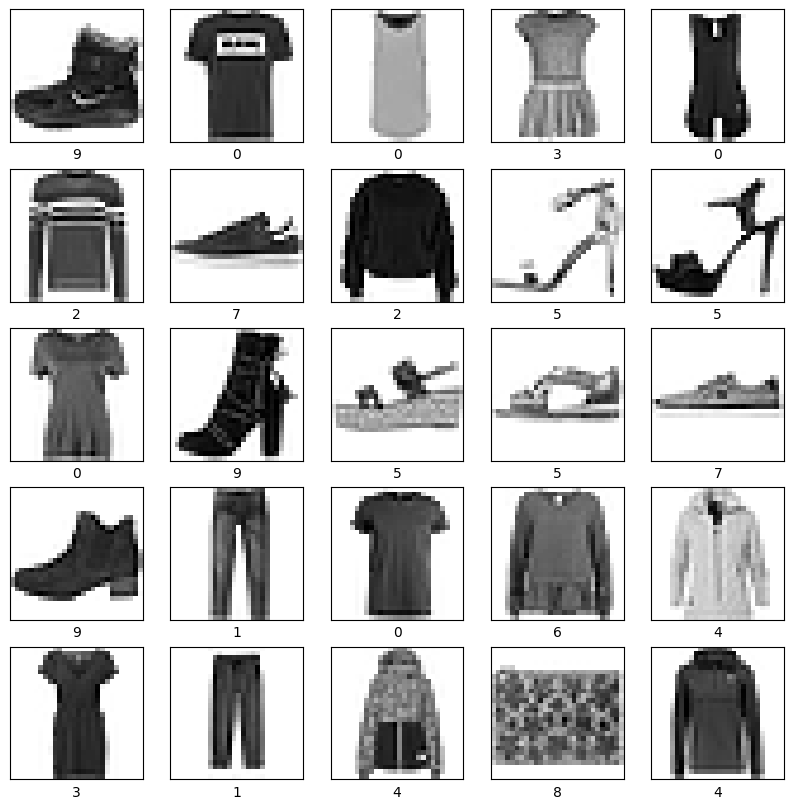

In [4]:
# prompt: visualize the dataset

import matplotlib.pyplot as plt

# Display the first few images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


done

now i need to normalize the pixels to the range [0, 1] and add a channel dimension

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

a note for me)(i just had no idea b it)

... is ellipsis operator and it is shorthand for slicing all dimensions up to that point which makes it useful when dealing with multi-dimensional arrays. it means 'keep all the existing dimensions as they are' and tf.newaxis adds a new dimension at the specified position. we need this bc fashion mnist loads images with the shape(28x28), and for a convultional neural network, we need to reshape the data to include a channel dimension

one-hot encode the labels

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

now im gonna build cnn model

In [7]:
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(filters=64, kernel_size=(7, 7), activation='relu',
                  kernel_regularizer=l2(0.001), input_shape=(28, 28, 1), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=l2(0.001), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=l2(0.001), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=l2(0.001), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=l2(0.001), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Global Average Pooling and Fully Connected Layers
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'he_normal' reffers to a weight initialization technique, this method is used to initialize the weights of the layers

now im compiling the model

In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Changed to 'categorical_crossentropy'
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,155,018 (4.41 MB)

 Trainable params: 1,153,354 (4.40 MB)

 Non-trainable params: 1,664 (6.50 KB)

im gonna add early stopping in case and then train it

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 756s 1s/step - accuracy: 0.3820 - loss: 3.0327 - val_accuracy: 0.7653 - val_loss: 1.6752
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 781s 1s/step - accuracy: 0.6890 - loss: 1.8981 - val_accuracy: 0.8142 - val_loss: 1.4585
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 790s 1s/step - accuracy: 0.7647 - loss: 1.6402 - val_accuracy: 0.8537 - val_loss: 1.3194
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 803s 1s/step - accuracy: 0.8057 - loss: 1.4689 - val_accuracy: 0.8512 - val_loss: 1.2656
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 750s 1s/step - accuracy: 0.8323 - loss: 1.3468 - val_accuracy: 0.8881 - val_loss: 1.1211
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 749s 999ms/step - accuracy: 0.8501 - loss: 1.2502 - val_accuracy: 0.8931 - val_loss: 1.0711
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 789s 1s/step - accuracy: 0.8653 - loss: 1.1551 - val_accuracy: 0.8878 - val_loss: 1.0155
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 792s 1s/step - accuracy: 0.8730 - loss: 1.0790 - val_a

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.9098 - loss: 0.5876
Test Accuracy: 91.11%


now the plotting part

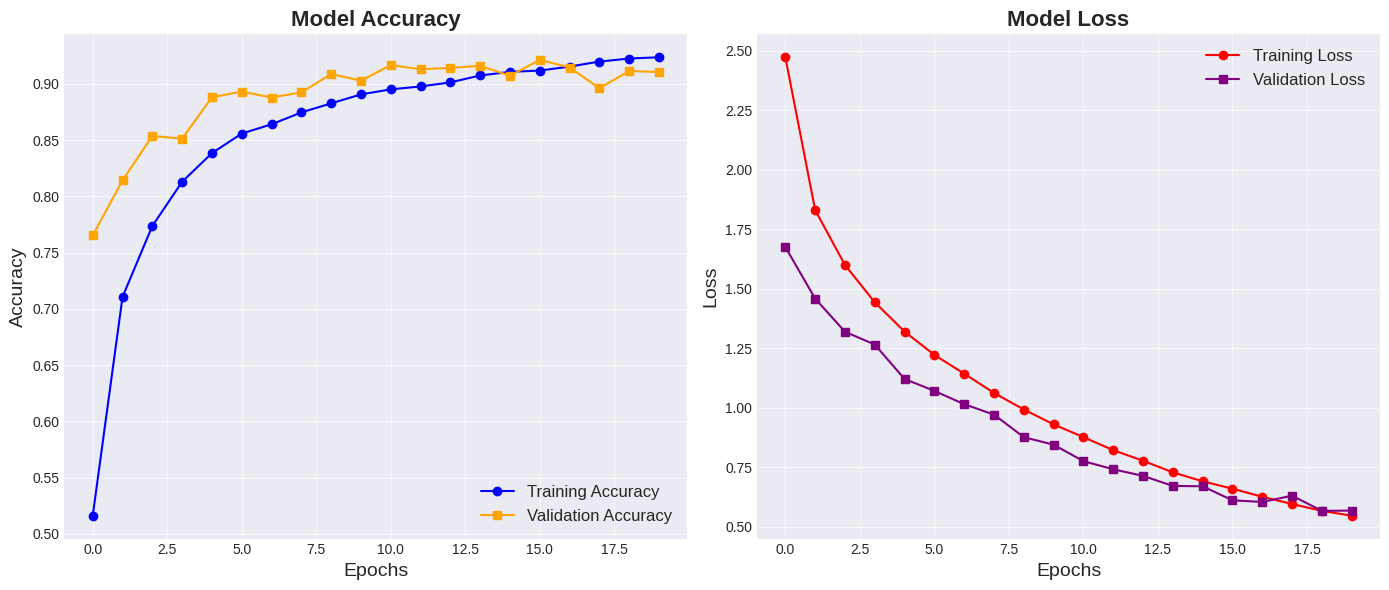

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training(history):
    plt.style.use('seaborn-v0_8-darkgrid')  # Updated style name
    plt.figure(figsize=(14, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='s')
    plt.title('Model Accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='red', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='purple', marker='s')
    plt.title('Model Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.6)

    plt.tight_layout()
    plt.show()

# Call the function to visualize
plot_training(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step


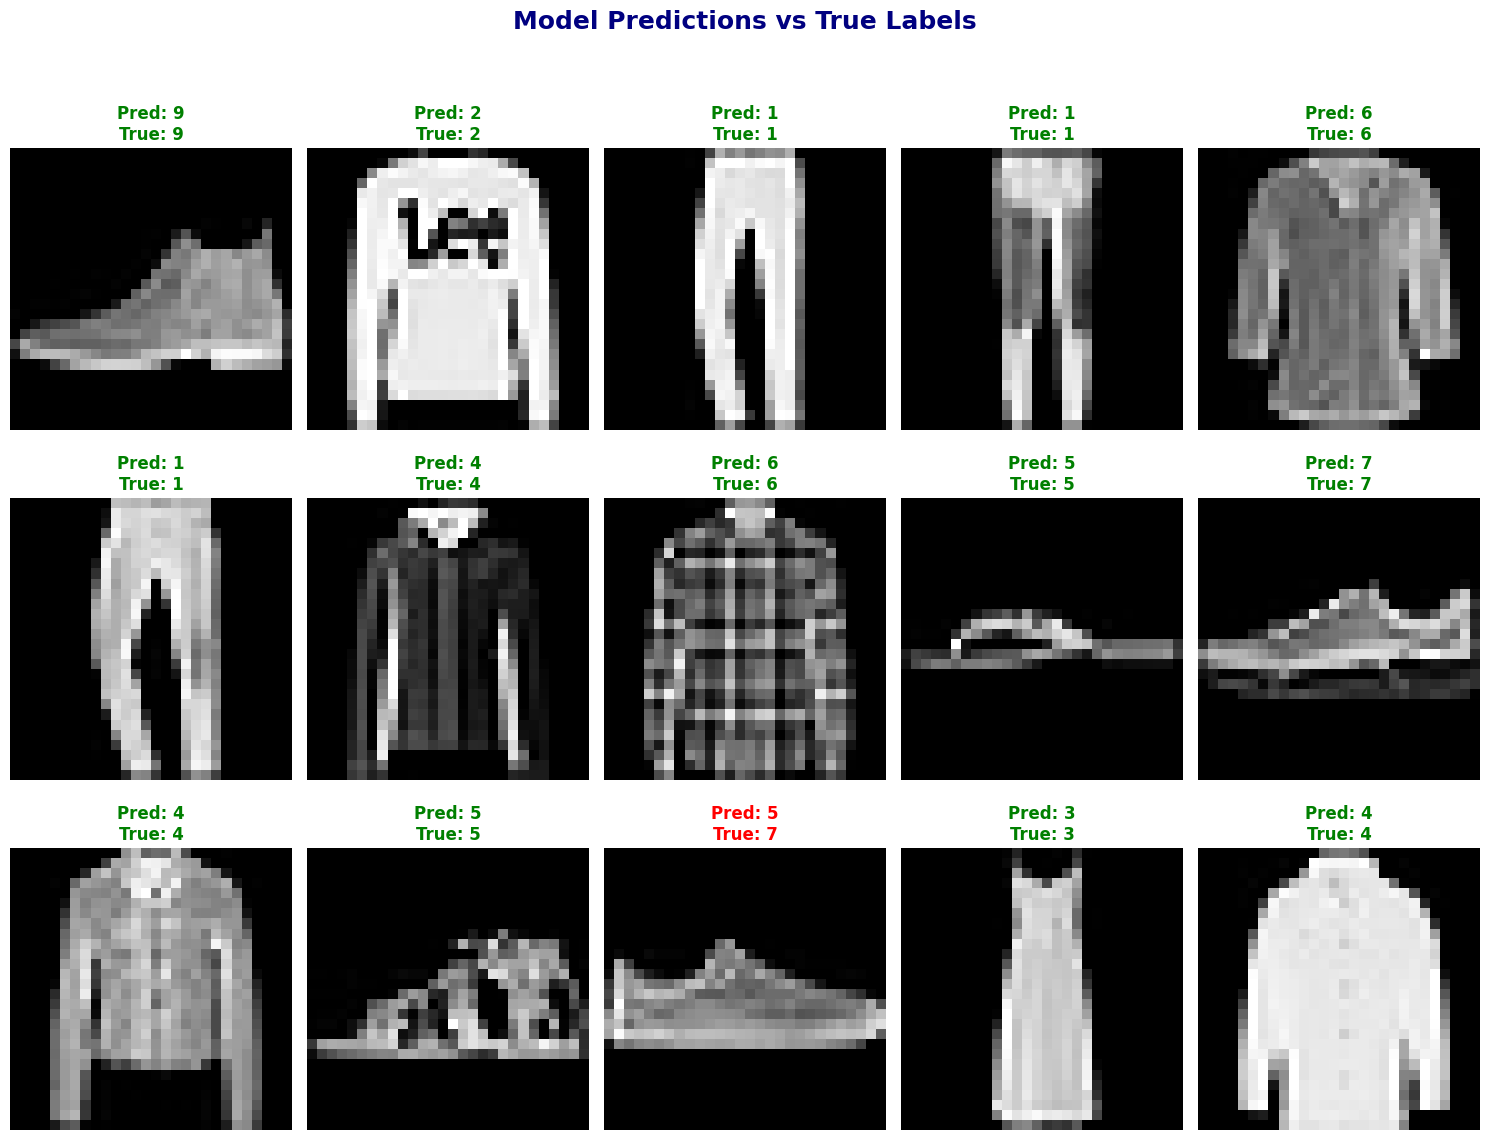

In [26]:
import seaborn as sns
def visualize_predictions(x_test, y_test, predictions, class_names):
    # Apply the seaborn style (using the modern style name)
    sns.set_style("darkgrid")
    plt.figure(figsize=(15, 12))
    plt.suptitle('Model Predictions vs True Labels', fontsize=18, fontweight='bold', color='navy')

    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i].squeeze(), cmap='gray', interpolation='nearest')

        pred_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[y_test[i]]  # Assuming y_test is not one-hot encoded
        color = 'green' if pred_label == true_label else 'red'

        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=12, color=color, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
    plt.show()

# Generate predictions
predictions = model.predict(x_test)

# Call the function to visualize predictions
visualize_predictions(x_test, y_test.argmax(axis=1), predictions, class_names=list(range(10))) # Corrected y_test to y_test.argmax(axis=1)